# Validate Somersalo scaling law

## Load data

In [1]:
from functools import partial

from multipac_testbench import AveragedThresholdSet, TestCampaign, ThresholdSet
from multipac_testbench.data import config_path
from multipac_testbench.data.multipactor_tests import tests_140
from multipac_testbench.instruments import CurrentProbe, ForwardPower
from multipac_testbench.util.multipactor_detectors import quantity_is_above_threshold

freqs = (140.0, 140.0, 140.0, 140.0)
swrs = (4.0, 3.0, 2.0, 1.0)

test_campaign =  TestCampaign.from_filepaths(
    tests_140,
    freqs,
    swrs,
    config_path,
    is_raw=True
)

[INFO    ] [loader.py           ] Applied trigger_policy = 'keep_all' on /home/placais/Documents/simulation/python/multipac_testbench/src/multipac_testbench/data/multipactor_tests/2025.06.20_140MHz-SWR4-11.csv
[ERROR   ] [factory.py          ] column_header = 'NI9205_E1' not present in provided file. Skipping associated instrument.
[INFO    ] [loader.py           ] Applied trigger_policy = 'keep_all' on /home/placais/Documents/simulation/python/multipac_testbench/src/multipac_testbench/data/multipactor_tests/2025.06.20_140MHz-SWR3-12.csv
[ERROR   ] [factory.py          ] column_header = 'NI9205_E1' not present in provided file. Skipping associated instrument.
[INFO    ] [loader.py           ] Applied trigger_policy = 'keep_all' on /home/placais/Documents/simulation/python/multipac_testbench/src/multipac_testbench/data/multipactor_tests/2025.06.20_140MHz-SWR2-13.csv
[ERROR   ] [factory.py          ] column_header = 'NI9205_E1' not present in provided file. Skipping associated instrument

/home/placais/Documents/simulation/python/multipac_testbench/src/multipac_testbench/util/physics.py:28: RuntimeWarning: invalid value encountered in sqrt
  reflection_coefficient = np.abs(np.sqrt(reflected_power / forward_power))
/home/placais/Documents/simulation/python/multipac_testbench/src/multipac_testbench/util/physics.py:28: RuntimeWarning: invalid value encountered in sqrt
  reflection_coefficient = np.abs(np.sqrt(reflected_power / forward_power))


## Calculate multipactor thresholds

In [2]:
current_multipactor_criterions = {'threshold': 14., 'minimum_number_of_points': 1}
current_multipac_detector = partial(quantity_is_above_threshold, **current_multipactor_criterions)

As Somersalo scaling law concerns power thresholds, we look for "global" multipactor criterions:

In [3]:
merged = test_campaign.determine_thresholds(
    current_multipac_detector,
    CurrentProbe,
    predicate=lambda t: t.sample_index > 300,  # Only consider Thresholds measured after 300th power step
    threshold_reducer="any",                   # Keyword to merge the multipactor zones
)

[WARNING ] [threshold.py        ] User should manually trim exceedent powers in order to avoid flat minima at the end of the test.
[WARNING ] [threshold.py        ] User should manually trim exceedent powers in order to avoid flat minima at the end of the test.
[WARNING ] [threshold.py        ] User should manually trim exceedent powers in order to avoid flat minima at the end of the test.
[WARNING ] [threshold.py        ] User should manually trim exceedent powers in order to avoid flat minima at the end of the test.


## Check Somersalo scaling law

### Naive thresholds

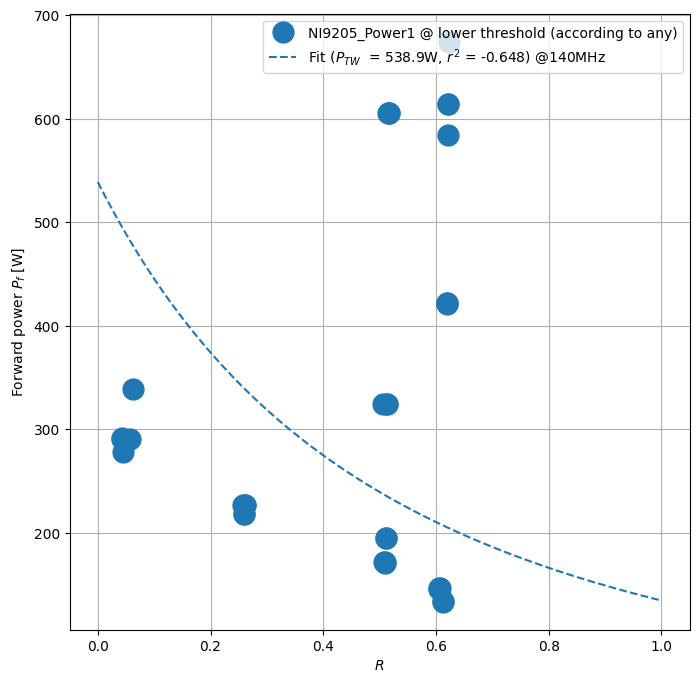

In [4]:
_ = test_campaign.check_somersalo_scaling_law(merged, figsize=(8, 8))

### Extreme thresholds

You can filter out the thresholds, to keep only one lower and one upper threshold per half-power cycle.

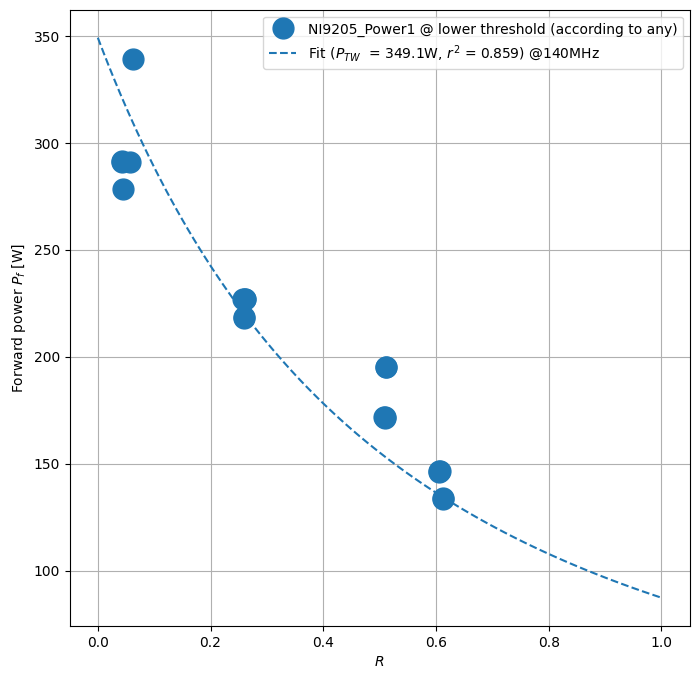

In [5]:
extreme = {test: ThresholdSet.extreme(threshold_set) for test, threshold_set in merged.items()}
_ = test_campaign.check_somersalo_scaling_law(extreme, figsize=(8, 8))

### Average thresholds

[INFO    ] [threshold_set.py    ] Removed the 0 thresholds detected by NI9205_MP8l
[INFO    ] [threshold_set.py    ] Removed the 0 thresholds detected by NI9205_MP8l
[INFO    ] [threshold_set.py    ] Removed the 0 thresholds detected by NI9205_MP8l
[INFO    ] [threshold_set.py    ] Removed the 0 thresholds detected by NI9205_MP8l


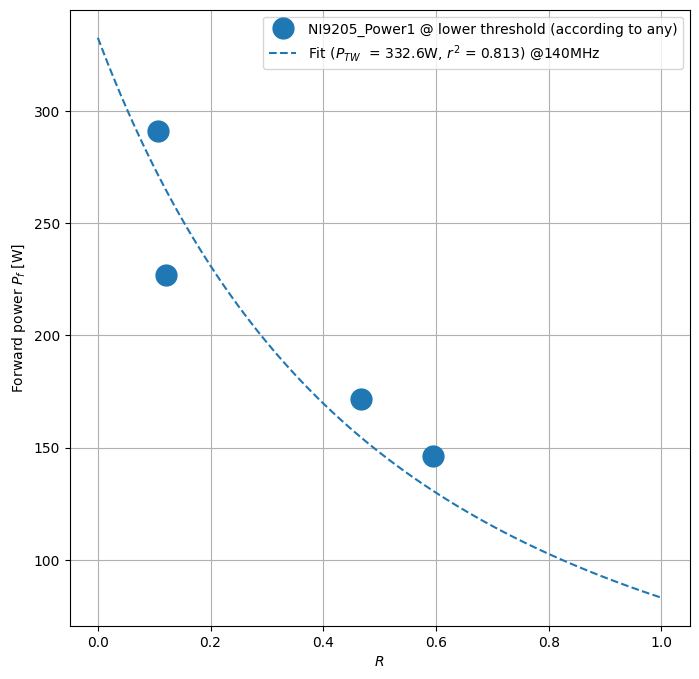

In [6]:
averaged = {test: AveragedThresholdSet.from_threshold_set(threshold_set) for test, threshold_set in merged.items()}
_ = test_campaign.check_somersalo_scaling_law(averaged, figsize=(8, 8))